In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import xarray as xr
import matplotlib.pyplot as plt

In [7]:
class LinearNetwork2(nn.Module):
    def __init__(self):
        super(LinearNetwork2,self).__init__()
        self.fc1=nn.Linear(2,10)
        self.fc2=nn.Linear(10,1)


    def forward(self,x):
        x=self.fc1(x)
        x=torch.relu(x)
        x=self.fc2(x)
        return x

model2=LinearNetwork2()

In [8]:
##Obtaining the data : rlon,rlat and GEV parameters
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/mberthier/repos/Downscaling_CM/data"
os.chdir(path)
gev_params=xr.open_dataset("gev_params_aout.nc")

In [9]:
##Defining the training set
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/mberthier/repos/Downscaling_CM/utils"
os.chdir(path)
import training_set

In [12]:
gev_params

<xarray.Dataset>
Dimensions:  (rlon: 176, rlat: 101)
Coordinates:
  * rlon     (rlon) float32 -3.0 -2.98 -2.96 -2.94 -2.92 ... 0.44 0.46 0.48 0.5
  * rlat     (rlat) float32 -1.0 -0.98 -0.96 -0.94 -0.92 ... 0.94 0.96 0.98 1.0
Data variables:
    shape    (rlat, rlon) float64 ...
    loc      (rlat, rlon) float64 2.875e-06 3.483e-06 ... 2.134e-05 1.79e-05
    scale    (rlat, rlon) float64 ...

In [11]:
input,output = training_set.training_set_location_only(gev_params)

/work/FAC/FGSE/IDYST/tbeucler/downscaling/mberthier/dev_env/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [15]:
input.size()

torch.Size([101, 176, 2])

In [14]:
input_test=torch.tensor([[-2.98,1]])
output_test=model2(input_test)
output_test

tensor([[0.6602]], grad_fn=<AddmmBackward0>)

Epoch [5/10], Loss: 0.0023
Epoch [10/10], Loss: 0.0018


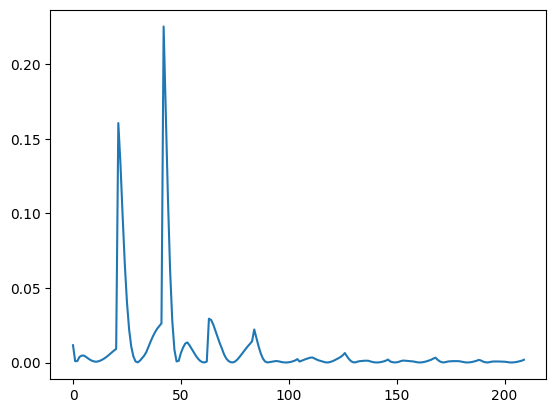

In [33]:
num_epoch=10
batch_size=5

optimizer= torch.optim.Adam(model2.parameters(), lr=0.01)
loss_fn=nn.MSELoss()
loss_list=[]
for epoch in range(num_epoch):
    for i in range(0, len(input), batch_size):
        batch_input = input[i:i+batch_size,i:i+batch_size]
        #print("Essai numéro",epoch,"avec un batch input de", {batch_input})
        batch_output = output[i:i+batch_size,i:i+batch_size].flatten()
        #print("Essai numéro",epoch,"avec un batch ouput de", {batch_output})
        outputs=model2(batch_input).flatten()
        loss=loss_fn(outputs,batch_output)
        loss_list.append(torch.detach(loss).numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epoch}], Loss: {loss.item():.4f}')
plt.plot(loss_list)
plt.show()

In [35]:
test_data = torch.tensor([[-2.5, 1], [1.0, 0.6]])
predicted_output = model2(test_data)
print(predicted_output)

tensor([[0.4707],
        [0.1233]], grad_fn=<AddmmBackward0>)
